In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Preprocessing

In [2]:
# importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

### Building models, fitting them to dataset and predicting the results

In [4]:
# Fitting Linear Regression to dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [5]:
# Fitting polynomial Regression to dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
# this is to transform our matrix of feature X having one variable to a matrix with degree = n, i.e. n variables.
X_poly = poly_reg.fit_transform(X)
# Now we perform multiple linear regression
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

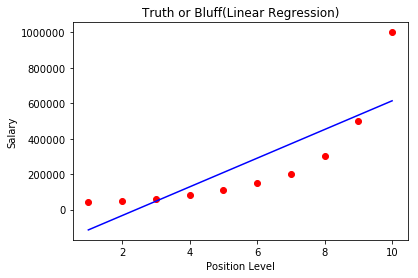

In [6]:
# Visualizing the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff(Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

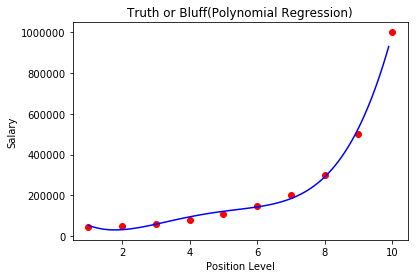

In [7]:
# Visualizing the Polynomial Regression results
# To get a smooth curve and remove the straight lines in the curve
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff(Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [8]:
# In order to make the trend line fit better to our data, we increase the degree of the polynomial
# in above case, try for degree = 2, 3, 4.

In [9]:
# predicting result with Linear Regression
print(lin_reg.predict(6.5))

[ 330378.78787879]


In [10]:
# predicting result with Polynomial Regression
print(lin_reg_2.predict(poly_reg.fit_transform(6.5)))

[ 158862.45265153]


In [11]:
# Therefore, the new employee was telling the truth about his previous company salary at a level of 6.5 which was $160K.